<a href="https://colab.research.google.com/github/WilliamAshbee/DataminingAssignments/blob/main/CovidSeverityPredictionExplore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print('hello')

hello


In [2]:
#https://www.kaggle.com/iamhungundji/covid19-symptoms-checker
#bonus work dataset: predict severity
# https://github.com/WilliamAshbee/DataminingAssignments/blob/main/covid-cleaned-data.csv
#!wget https://raw.githubusercontent.com/WilliamAshbee/DataminingAssignments/main/covid-cleaned-data.csv

In [3]:
import pandas as pd
url = 'https://raw.githubusercontent.com/WilliamAshbee/DataminingAssignments/main/covid-cleaned-data.csv'
df_cov = pd.read_csv(url,error_bad_lines=False)

In [4]:
df_cov.shape

(316800, 27)

In [5]:
df_cov.columns

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes', 'Country'],
      dtype='object')

In [6]:
columns = ['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes', 'Country']
cmap = dict()
for i in range(len(columns)):
  cmap[columns[i]] = i 

yfcols = [ 'Severity_Severe']

yfinds = [cmap[col] for col in yfcols]

ycols = [  'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe']

yinds = [cmap[col] for col in ycols]


print(yinds,yfinds)

[19, 20, 21, 22] [22]


In [7]:
df_nump = df_cov.to_numpy()

In [8]:
import numpy as np
y = df_nump[:,yfinds]
print(y)
for i in range(2):
  print('class',i,'total',np.sum(y==i))

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
class 0 total 237600
class 1 total 79200


In [9]:
xind = []
for i in range(len(columns)-1):
  if i not in yinds:
    xind.append(i)
print(xind)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 23, 24, 25]


In [10]:
X = df_nump[:,xind].astype(float)
print(X)
np.random.seed(seed=0)
args = np.random.choice(X.shape[0], (int)(X.shape[0]/10.0))
X = X[args]

[[1. 1. 1. ... 0. 0. 1.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [11]:
"""import csv

lines =0 
with open("covid-cleaned-data.csv") as f:
    reader = csv.reader(f)
    for row in reader:
      lines+=1
      if lines > 10:
        break
      print(" ".join(row))
"""

'import csv\n\nlines =0 \nwith open("covid-cleaned-data.csv") as f:\n    reader = csv.reader(f)\n    for row in reader:\n      lines+=1\n      if lines > 10:\n        break\n      print(" ".join(row))\n'

https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb

In [12]:

from sklearn.cluster import KMeans

# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      for j in range(points.shape[1]):
        curr_sse += (points[i, j] - curr_center[j]) ** 2 
      
    sse.append(curr_sse)
  return sse


In [13]:
wss_list = calculate_WSS(X,4)



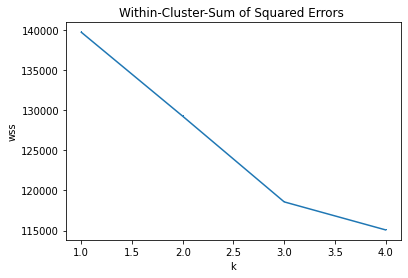

In [14]:
import matplotlib.pyplot as plt
xs = [i for i in range(1,5)]

fig = plt.figure()
ax1 = fig.add_subplot()
ax1.set_ylabel('wss')
ax1.set_xlabel('k')
ax1.set_title('Within-Cluster-Sum of Squared Errors ')

plt.plot(xs,wss_list,',-')


Within this dataset, it is likely that there are 3 clusters of patients. If this dataset is clean relating to patients, then I would guess the clusters relate to either severity or disease type. 

In [15]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(X)


AttributeError: ignored